# IMPORTS


In [511]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1.PROBLEM STATEMENT

To predict price of car based on features

# 2.DATA GATHERING

In [512]:
df = pd.read_csv('/content/car_price_prediction.csv')

# 3.EDA

In [513]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [514]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [515]:
#shape
df.shape

(19237, 18)

In [516]:
#check for null values
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [517]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [518]:
#checking unique values
df['Manufacturer'].nunique()

65

In [519]:
df['Model'].nunique()

1590

In [520]:
df['Category'].nunique()

11

In [521]:
df['Fuel type'].nunique()

7

In [522]:
df['Gear box type'].nunique()

4

In [523]:
df['Drive wheels'].nunique()

3

In [524]:
df['Doors'].nunique()

3

In [525]:
df['Wheel'].nunique()

2

In [526]:
df['Color'].nunique()

16

In [527]:
df['Mileage'].tail(10)

,Mileage
19227,219030 km
19228,122874 km
19229,150000 km
19230,307325 km
19231,107800 km
19232,300000 km
19233,161600 km
19234,116365 km
19235,51258 km
19236,186923 km


In [528]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [529]:
#check for duplicate values
df.duplicated().sum()

313

In [530]:
#description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


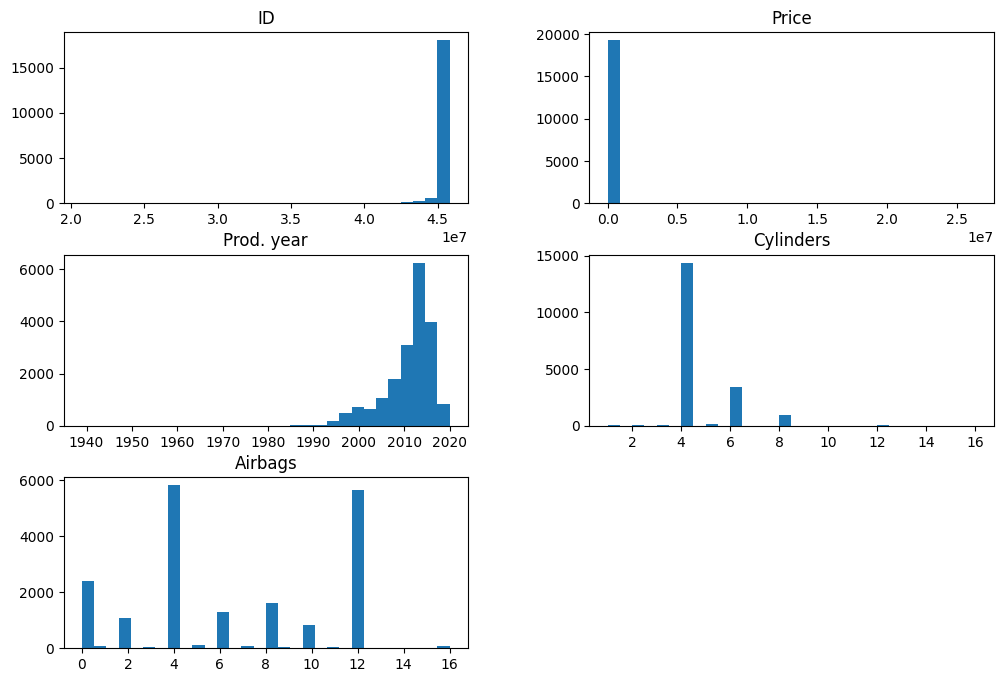

In [531]:
#plot
df.hist(figsize=(12, 8), bins=30, grid=False)
plt.show()

# 4.FEATURE ENGINEERING

## 1.Handling Duplicate Values

In [532]:
df.drop_duplicates(inplace=True) #drops duplicated values
df.duplicated().sum()

0

## 2.Drop Unnecessary Columns

In [533]:
df = df.drop(columns=['ID'])  # ID is useless


## 3.Converting to numeric

### Special case


In [534]:
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=True)  # Remove "km"
df['Mileage'] = pd.to_numeric(df['Mileage'])  # Convert to number


In [535]:
df['Levy'] = df['Levy'].replace('-', np.nan)  #replace "-" with NaN

df['Levy'] = pd.to_numeric(df['Levy'])   # Convert to number

df['Turbo'] = df['Engine volume'].astype(str).str.contains('turbo', case=False, na=False).astype(int)  # 1 if turbo, 0 if not
df['Engine volume'] = df['Engine volume'].astype(str).str.replace(' turbo', '', case=False, regex=True)  # Remove turbo
df['Engine volume'] = pd.to_numeric(df['Engine volume'])

In [536]:
df.isnull().sum()  # Check number of NaN values in each column
len(df)  # Get the number of rows before dropping


18924

In [537]:
missing_percentage = (df.isnull().sum().sum() / df.size) * 100
print(f"Percentage of missing values: {missing_percentage}%")


Percentage of missing values: 1.6760022546325655%


In [538]:
df.dropna(axis=0, inplace=True)  # Drop rows with any NaN values


One-Hot Encoding

In [539]:
df = pd.get_dummies(df, columns=['Manufacturer', 'Category', 'Fuel type', 'Color','Drive wheels','Gear box type','Doors'], drop_first=True)


Label Encoding

In [540]:
Encoder1 = LabelEncoder()
Encoder2 = LabelEncoder()
df['Leather interior'] = Encoder1.fit_transform(df['Leather interior'])
df['Wheel'] = Encoder2.fit_transform(df['Wheel'])

Frequency Encoding

In [541]:
df['Model'] = df['Model'].map(df['Model'].value_counts())  # Frequency Encoding


In [542]:
df

,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,...,Color_Sky blue,Color_White,Color_Yellow,Drive wheels_Front,Drive wheels_Rear,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Doors_04-May,Doors_>5
0,13328,1399.0,170,2010,1,3.5,186005,6.0,0,12,...,False,False,False,False,False,False,False,False,True,False
1,16621,1018.0,19,2011,0,3.0,192000,6.0,0,8,...,False,False,False,False,False,False,True,False,True,False
3,3607,862.0,113,2011,1,2.5,168966,4.0,0,0,...,False,True,False,False,False,False,False,False,True,False
4,11726,446.0,218,2014,1,1.3,91901,4.0,0,4,...,False,False,False,True,False,False,False,False,True,False
5,39493,891.0,516,2016,1,2.0,160931,4.0,0,4,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.0,494,2013,1,3.5,107800,6.0,0,12,...,False,False,False,False,True,False,False,False,True,False
19233,15681,831.0,1016,2011,1,2.4,161600,4.0,0,8,...,False,False,False,True,False,False,True,False,True,False
19234,26108,836.0,410,2010,1,2.0,116365,4.0,0,4,...,False,False,False,True,False,False,False,False,True,False
19235,5331,1288.0,138,2007,1,2.0,51258,4.0,0,4,...,False,False,False,True,False,False,False,False,True,False


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13215 entries, 0 to 19236
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       13215 non-null  int64  
 1   Levy                        13215 non-null  float64
 2   Model                       13215 non-null  int64  
 3   Prod. year                  13215 non-null  int64  
 4   Leather interior            13215 non-null  int64  
 5   Engine volume               13215 non-null  float64
 6   Mileage                     13215 non-null  int64  
 7   Cylinders                   13215 non-null  float64
 8   Wheel                       13215 non-null  int64  
 9   Airbags                     13215 non-null  int64  
 10  Turbo                       13215 non-null  int64  
 11  Manufacturer_AUDI           13215 non-null  bool   
 12  Manufacturer_BENTLEY        13215 non-null  bool   
 13  Manufacturer_BMW            13215 no

## 4.Scale Numerical Features

In [544]:
scaler = StandardScaler()
df[['Mileage', 'Engine volume', 'Levy', 'Cylinders' , 'Airbags']] = scaler.fit_transform(df[['Mileage', 'Engine volume', 'Levy' , 'Cylinders' , 'Airbags']])


# CHECKING CORRELATION

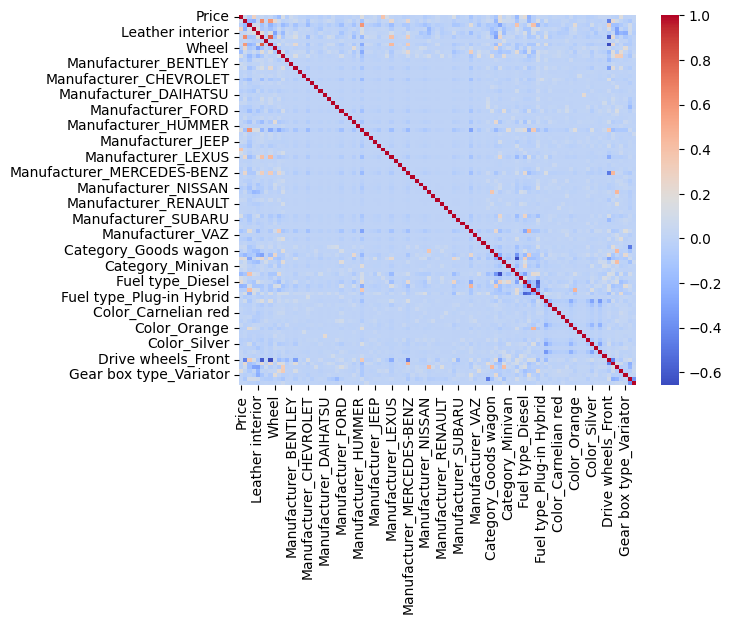

In [545]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()


# 5.FEATURE SELECTION

In [546]:
x = df.drop(columns=['Price'])
y = df['Price']

# 6.MODEL TRAINING

In [547]:
# Splitting into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [548]:
# Check if there are any NaN values in x_train and y_train
print(x_train.isnull().sum())  # Check missing values in features
print(y_train.isnull().sum())  # Check missing values in target


Levy                       0
Model                      0
Prod. year                 0
Leather interior           0
Engine volume              0
                          ..
Gear box type_Manual       0
Gear box type_Tiptronic    0
Gear box type_Variator     0
Doors_04-May               0
Doors_>5                   0
Length: 94, dtype: int64
0


In [549]:
df['Levy'].isnull().sum()  # This will confirm if there are missing values


0

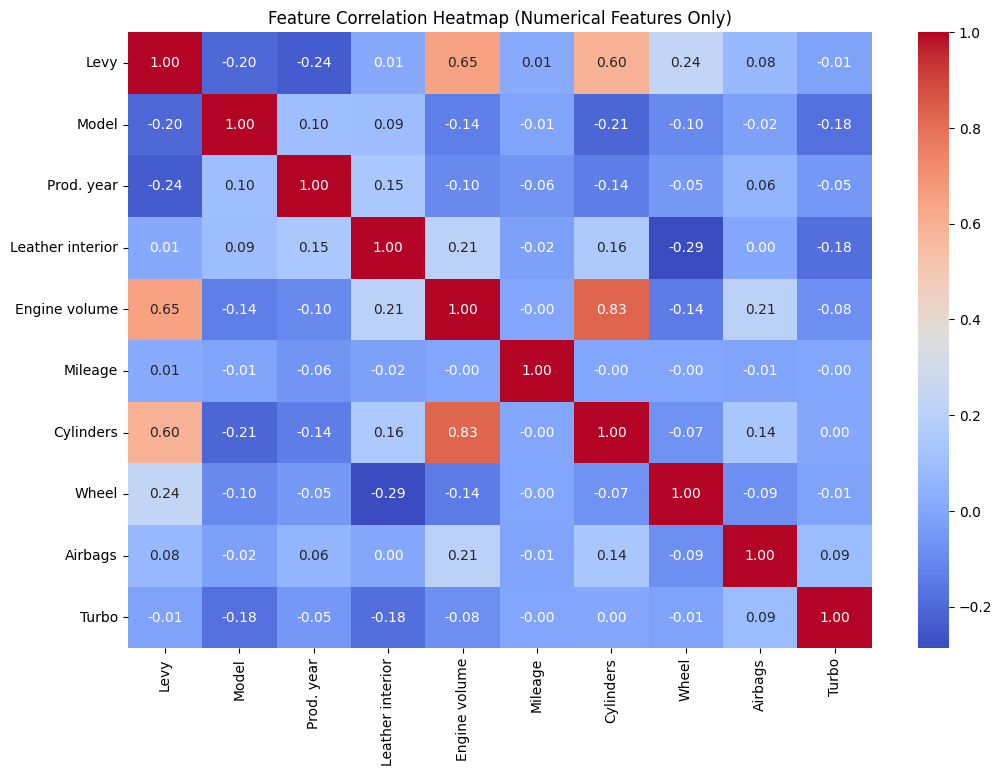

In [550]:
num_cols = x_train.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(x_train[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Numerical Features Only)")
plt.show()


In [551]:

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

# Get feature importance
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance)


                    Feature  Importance
90  Gear box type_Tiptronic    0.106487
67         Fuel type_Diesel    0.096903
8                   Airbags    0.054151
23        Manufacturer_FORD    0.050044
9                     Turbo    0.044998
..                      ...         ...
49       Manufacturer_SKODA    0.000000
55         Manufacturer_VAZ    0.000000
57       Manufacturer_VOLVO    0.000000
14    Manufacturer_CADILLAC    0.000000
13       Manufacturer_BUICK    0.000000

[94 rows x 2 columns]


In [552]:
# Find features with zero importance
zero_importance_features = importance[importance["Importance"] == 0]["Feature"].tolist()

# Drop them from training & test sets
x_train = x_train.drop(columns=zero_importance_features)
x_test = x_test.drop(columns=zero_importance_features)


In [553]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=3000,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=5,
    early_stopping_rounds=100,
    random_state=42
)
xgb_model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    verbose=True
)



[0]	validation_0-rmse:22314.21513
[1]	validation_0-rmse:22068.34378
[2]	validation_0-rmse:21840.55402
[3]	validation_0-rmse:21591.43062
[4]	validation_0-rmse:21370.37335
[5]	validation_0-rmse:21096.26756
[6]	validation_0-rmse:20910.68818
[7]	validation_0-rmse:20681.37918
[8]	validation_0-rmse:20454.42042
[9]	validation_0-rmse:20285.26748
[10]	validation_0-rmse:20114.14287
[11]	validation_0-rmse:19928.51432
[12]	validation_0-rmse:19767.26657
[13]	validation_0-rmse:19658.60161
[14]	validation_0-rmse:19525.03604
[15]	validation_0-rmse:19384.97016
[16]	validation_0-rmse:19255.11790
[17]	validation_0-rmse:19165.16199
[18]	validation_0-rmse:19051.32934
[19]	validation_0-rmse:18944.21105
[20]	validation_0-rmse:18838.40051
[21]	validation_0-rmse:18744.89282
[22]	validation_0-rmse:18649.37042
[23]	validation_0-rmse:18571.52908
[24]	validation_0-rmse:18486.04339
[25]	validation_0-rmse:18413.72645
[26]	validation_0-rmse:18320.65453
[27]	validation_0-rmse:18264.77562
[28]	validation_0-rmse:18215.3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [554]:
y_pred = xgb_model.predict(x_test)

# 7.MODEL EVALUATION

Evaluating model by creating a function

In [555]:
def model_eval(input_data,actual_data):
  y_pred = xgb_model.predict(input_data)
  mse = mean_squared_error(actual_data, y_pred)
  r2 = r2_score(actual_data, y_pred)
  mae = mean_absolute_error(actual_data, y_pred)

  print(f"Mean Squared Error: {mse}")
  print(f"Mean Absolute Error: {mae}")
  print(f"R-squared: {r2}")

  return "SUCCESS"

## MODEL EVALUATION OF TRAINING DATA

In [556]:
model_eval(x_train,y_train)

Mean Squared Error: 17315526.0
Mean Absolute Error: 2562.476318359375
R-squared: 0.9449821710586548


'SUCCESS'

## MODEL EVALUATION OF TESTING DATA

In [557]:
model_eval(x_test,y_test)

Mean Squared Error: 201135424.0
Mean Absolute Error: 4676.04541015625
R-squared: 0.6085823774337769


'SUCCESS'

## BIAS-VARIANCE TRADEOFF



*   MODEL ACCEPTANCE CRITERIA(MAC): 95% ACCURACY
*   TRAINING ACCURACY(TRA): 94% ACCURACY


*   TESTING ACCURACY(TEA): 60% ACCURACY








*   BIAS: MAC-TRA = 1% -> LOW BIAS
*   VARIANCE: TRA-TEA = 34% -> HIGH VARIANCE  



HENCE MODEL IS OVERFITTING

In [558]:
import pickle
with open("Car_Pred_Model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [561]:
import json
column_names = {"column_names": list(x.columns)}
with open("Column.json", "w") as f:
    json.dump(column_names, f)

#Conclusion and Future Improvements
##Model Performance Summary

*   The final XGBoost model achieved a train R² of 0.9449 and a test R² of 0.6086.

*   This indicates that the model fits well on training data but has a performance gap on test data, suggesting some degree of overfitting.

*   The Mean Absolute Error (MAE) on the test set is reasonable, indicating that the model can still make useful predictions.

##Challenges and Overfitting


*   The model performs exceptionally well on training data, but the performance drops on test data.
*   The main reason for this overfitting is likely high model complexity (e.g., deep trees, too many estimators).

*   Certain features may have a high impact on predictions, which might cause the model to memorize patterns rather than generalize.

##Potential Improvements

To further improve the model and reduce overfitting, the following steps can be taken:



1.  Feature Selection – Removing less important features (e.g., those with very low importance).
2.   Hyperparameter Tuning – Reducing max depth, increasing regularization (reg_alpha, reg_lambda), and adjusting learning_rate.

3.   More Data – Increasing training data can help the model generalize better.
Ensemble Methods – Combining models or using techniques like stacking may improve generalization.
4.   Cross-validation – Using k-fold cross-validation instead of a simple train-test split to get a better estimate of real-world performance.

##Final Thoughts
**Despite some overfitting, the model is still useful for making predictions. The insights gained from feature importance analysis can help in better understanding key factors affecting the target variable. Future work can focus on improving generalization while maintaining strong predictive power.**

